In [1]:
!mkdir -p results results/dqn

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import gym
from gym.wrappers import Monitor

In [4]:
import base
from src.agents import DeepQAgent
from src.downsamplers import downsample_pong

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [5]:
env = gym.make('Pong-v4')
env = Monitor(env, './monitor/dqn/pong-non-deterministic', force=True)

In [6]:
env.observation_space

Box(210, 160, 3)

In [7]:
env.action_space

Discrete(6)

# Agent

In [8]:
agent = DeepQAgent(env, downsample_pong, replay_memory_size=0)
agent.model.load_weights('./models/dqn/pong-nondeterministic.h5')
agent

DeepQAgent(
    env=<Monitor<TimeLimit<AtariEnv<Pong-v4>>>>,
    downsample=Downsampler(y=(34, 16), x=(15, 15), cut=[107, 87]),
    replay_memory_size=0,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x7f6061096eb8>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x7f601a0591e0>,
    image_size=(84, 84),
    render_mode='human'
)

In [9]:
fps = None # 60
scores = agent.play(games=100, fps=fps)
scores = pd.Series(scores)
scores

100%|██████████| 100/100 [14:32<00:00,  8.72s/game]


0     13.0
1      4.0
2      3.0
3     11.0
4      6.0
5      7.0
6      6.0
7     10.0
8     -1.0
9      0.0
10     9.0
11    10.0
12    12.0
13     7.0
14     8.0
15    -3.0
16    10.0
17     4.0
18    11.0
19    11.0
20     6.0
21    13.0
22     7.0
23     8.0
24    13.0
25    12.0
26    11.0
27     8.0
28     4.0
29    15.0
      ... 
70     4.0
71    10.0
72     8.0
73     8.0
74    16.0
75    11.0
76     6.0
77    -9.0
78     8.0
79     9.0
80    11.0
81     8.0
82     8.0
83     7.0
84    10.0
85     4.0
86     6.0
87    10.0
88     8.0
89    10.0
90    12.0
91    -2.0
92    11.0
93    18.0
94    13.0
95     8.0
96     3.0
97    14.0
98     5.0
99     7.0
Length: 100, dtype: float64

In [10]:
scores.to_csv('results/dqn/non-deterministic.csv')

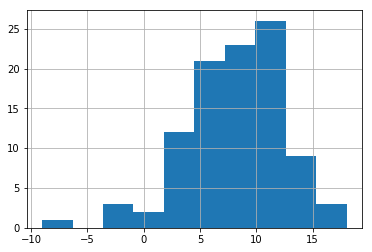

In [11]:
_ = scores.hist()

In [12]:
scores.describe()

count    100.000000
mean       8.040000
std        4.254338
min       -9.000000
25%        6.000000
50%        8.000000
75%       11.000000
max       18.000000
dtype: float64